In [189]:
#import library for analysis
import pandas as pd
#WordNetLemmatizer for reducing inflection in words to their root form
from nltk.stem import WordNetLemmatizer
#stopwords 
from nltk.corpus import stopwords
#splits a string using a regular expression
from nltk.tokenize import RegexpTokenizer
import string

In [190]:
#assigning stop words (english library) to variable
sw = stopwords.words('english')

In [191]:
#read raw GA report
data = pd.read_excel('/Users/mzimmermann/Downloads/Analytics 04. Vistaprint NP - Prod - ANZ HC Search Terms ANZ 20210425-20210502.xlsx', sheet_name='Dataset1')
data.tail(10)

,Search Term,Search Results Number (cd72),Total Unique Searches,Results Pageviews / Search
1167,wrong products delivered,10.0,1,1.000000
1168,wrong sign,10.0,1,1.000000
1169,wrong size,10.0,1,1.000000
1170,you are advertising on channel nine australia. why are you using an american ascent? very offensive.,10.0,1,1.000000
1171,you change the size of mask gradients,10.0,1,1.000000
1172,you have the back of the card in the order aswell what i have put threw,10.0,1,1.000000
1173,you must be logged in,10.0,1,1.000000
1174,you’re note pads are they really so expensive like $10,10.0,1,1.000000
1175,zippay,0.0,1,1.000000
1176,NaN,NaN,1300,1.342308


In [192]:
# cols lower case and spaces repalced with underscore
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ','_'))
data.columns = cols

In [193]:
#selecting col SearchTerm
df = data.iloc[:, 0][:-1]
#removing last row(summary)
df = df[:-1]

In [194]:
df

0                                                                                                   shipping
1                                                                                                      order
2                                                                                                     sample
3                                                                                   change background colour
4                                                                                             delete account
                                                        ...                                                 
1170    you are advertising on channel nine australia. why are you using an american ascent? very offensive.
1171                                                                   you change the size of mask gradients
1172                                 you have the back of the card in the order aswell what i have put threw
1173               

In [195]:
#function to remove punctuation from search terms ('.', ',' ect)
def remove_punctuation(text):
    no_punct = ''.join([c for c in text if c not in string.punctuation])
    return no_punct

In [196]:
cols

['search_term',
 'search_results_number_(cd72)',
 'total_unique_searches',
 'results_pageviews_/_search']

In [197]:
#applying function row by row
df = df.apply(lambda x: remove_punctuation(x))
df

0                                                                                                shipping
1                                                                                                   order
2                                                                                                  sample
3                                                                                change background colour
4                                                                                          delete account
                                                      ...                                                
1170    you are advertising on channel nine australia why are you using an american ascent very offensive
1171                                                                you change the size of mask gradients
1172                              you have the back of the card in the order aswell what i have put threw
1173                                          

In [198]:
#split strings
tokenizer = RegexpTokenizer(r'\w+')
df = df.apply(lambda x: tokenizer.tokenize(x.lower()))
df

0                                                                                                               [shipping]
1                                                                                                                  [order]
2                                                                                                                 [sample]
3                                                                                             [change, background, colour]
4                                                                                                        [delete, account]
                                                               ...                                                        
1170    [you, are, advertising, on, channel, nine, australia, why, are, you, using, an, american, ascent, very, offensive]
1171                                                                         [you, change, the, size, of, mask, gradients]
1172            

In [199]:
#function to remove stop words
def remove_stopwords(text):
    words =  [w for w in text if w not in stopwords.words('english')]
    return words

In [200]:
#applying function row by row
df = df.apply(lambda x: remove_stopwords(x))
df

0                                                                        [shipping]
1                                                                           [order]
2                                                                          [sample]
3                                                      [change, background, colour]
4                                                                 [delete, account]
                                           ...                                     
1170    [advertising, channel, nine, australia, using, american, ascent, offensive]
1171                                                [change, size, mask, gradients]
1172                                        [back, card, order, aswell, put, threw]
1173                                                                 [must, logged]
1174                                      [note, pads, really, expensive, like, 10]
Name: search_term, Length: 1175, dtype: object

In [201]:
lemmatizer = WordNetLemmatizer()
#function to iterate through the column
def word_lemmatizer(text):
    lem_text = ' '.join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

In [202]:
#lemmatize the word to the word root
df = df.apply(lambda x: word_lemmatizer(x))
df

0                                                                 shipping
1                                                                    order
2                                                                   sample
3                                                 change background colour
4                                                           delete account
                                       ...                                
1170    advertising channel nine australia using american ascent offensive
1171                                             change size mask gradient
1172                                      back card order aswell put threw
1173                                                           must logged
1174                                     note pad really expensive like 10
Name: search_term, Length: 1175, dtype: object

In [203]:
#looping through column and storing values to a list
text = []
for i in df:
    text.append(i)

In [204]:
#creating one string in order to visualize a wordcloud
unique_str = (" ").join(text)

In [205]:
#importing wordcloud for visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

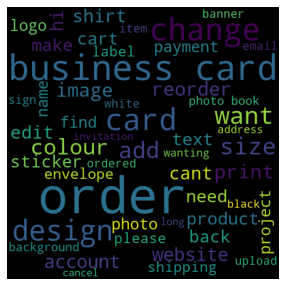

In [206]:
# show 50 words in the wordcloud
wordcloud = WordCloud(width=500, height=500, max_words=50).generate(unique_str)
plt.figure(figsize=(10,5))
# plot the WordCloud image 

plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [207]:
#splitting into multiple strings for barplot visualization
word_list = pd.DataFrame(unique_str.split())

<AxesSubplot:xlabel='0'>

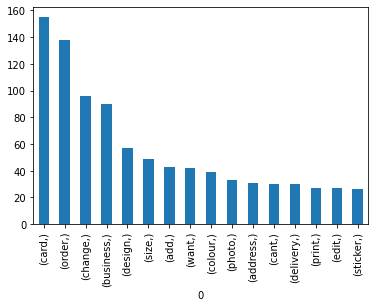

In [208]:
#barplot where count is greater than 100
word_list.value_counts()[word_list.value_counts()>25].plot(kind='bar')

In [209]:
#function to count words
def word_count_func(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [210]:
#applying function to the unique_str
word_count = word_count_func(unique_str)

In [211]:
type(word_count)

dict

In [212]:
#converting dict to a dataframe
search_terms = pd.DataFrame(word_count.items())
#renaming columns
search_terms.columns = ['search_term', 'count']
#sorting dataframe decending and reset index
search_terms_ordered = search_terms.sort_values(['count'], ascending=False).reset_index(drop=True)

In [213]:
#storing top 50 words based on count to variable
ANZ_search_terms_clean = search_terms_ordered.head(50)
#save file (UPDATE FOLDER)
ANZ_search_terms_clean.to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/Week18/ANZ_search_terms_clean.xlsx', index=False)

In [214]:
#reading orignal GA data to compare with ANZ_search
data1 = data[:-1]
data1.head()

,search_term,search_results_number_(cd72),total_unique_searches,results_pageviews_/_search
0,shipping,10.0,7,1.00
1,order,10.0,5,1.00
2,sample,2.0,5,1.00
3,change background colour,10.0,4,1.00
4,delete account,10.0,4,1.25


In [215]:
pd.options.display.max_rows = 500
pd.set_option('display.max_colwidth', 400)
data1[data1['search_term'].str.contains('shipping')]

,search_term,search_results_number_(cd72),total_unique_searches,results_pageviews_/_search
0,shipping,10.0,7,1.000000
17,shipping,5.0,3,1.666667
24,can not change shipping method,10.0,2,1.000000
408,dropshipping,0.0,1,1.000000
504,hi your price for the business cards is incorrect when in my cart and also no free shipping as stated,10.0,1,1.000000
542,how do i change shipping,10.0,1,3.000000
767,international shipping,10.0,1,2.000000
918,problem with shipping adress,10.0,1,1.000000
977,shipping,2.0,1,2.000000
978,shipping,7.0,1,1.000000


In [216]:
#data[data['search_term'].str.contains('project')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/Week18/project.xlsx', index=False)

In [217]:
ANZ_search_terms_clean.head(15)

,search_term,count
0,card,155
1,order,138
2,change,96
3,business,90
4,design,57
5,size,49
6,add,43
7,want,42
8,colour,39
9,photo,33


In [218]:
#change folder
writer = pd.ExcelWriter(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/Week18/ANZ_search_extended.xlsx')

data1[data1['search_term'].str.contains('card')].to_excel(writer,'card',index=False)
data1[data1['search_term'].str.contains('order')].to_excel(writer,'order',index=False)
data1[data1['search_term'].str.contains('change')].to_excel(writer,'change',index=False)
data1[data1['search_term'].str.contains('design')].to_excel(writer,'design',index=False)
data1[data1['search_term'].str.contains('size')].to_excel(writer,'size',index=False)
data1[data1['search_term'].str.contains('add')].to_excel(writer,'add',index=False)
data1[data1['search_term'].str.contains('want')].to_excel(writer,'want',index=False)
data1[data1['search_term'].str.contains('colour')].to_excel(writer,'colour',index=False)
data1[data1['search_term'].str.contains('photo')].to_excel(writer,'photo',index=False)
data1[data1['search_term'].str.contains('address')].to_excel(writer,'address',index=False)
data1[data1['search_term'].str.contains('delivery')].to_excel(writer,'delivery',index=False)
data1[data1['search_term'].str.contains('shipping')].to_excel(writer,'shipping',index=False)
data1[data1['search_term'].str.contains('sample')].to_excel(writer,'sample',index=False)


writer.save()